# Regression Visualization

In [48]:
#| label: load_dataset
#| code-fold: false
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the California Housing dataset
california_housing = datasets.fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

# Load the California Housing dataset as a DataFrame
df_california_housing = california_housing.frame

# Display the first few entries of the DataFrame
print(df_california_housing.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [49]:
#| label: feature
#| code-fold: false

# Select the specified features
features_of_interest = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "AveOccup", "Population"]

# Acquiring independent and dependent variables
X = df_california_housing[features_of_interest]
y = df_california_housing['MedHouseVal']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [50]:
#| label: linReg_model
#| code-fold: false

# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
#| label: performance
#| code-fold: false
def performance_stat(y_test, y_pred):
  from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

  # Calculate regression metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Absolute Error (MAE): {mae:.2f}')
  print(f'Mean Squared Error (MSE): {mse:.2f}')
  print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
  print(f'R-squared (R²): {r2:.2f}')

In [52]:
#| label: linReg_performance
#| code-fold: false
performance_stat(y_test, y_pred)

Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.64
Root Mean Squared Error (RMSE): 0.80
R-squared (R²): 0.51


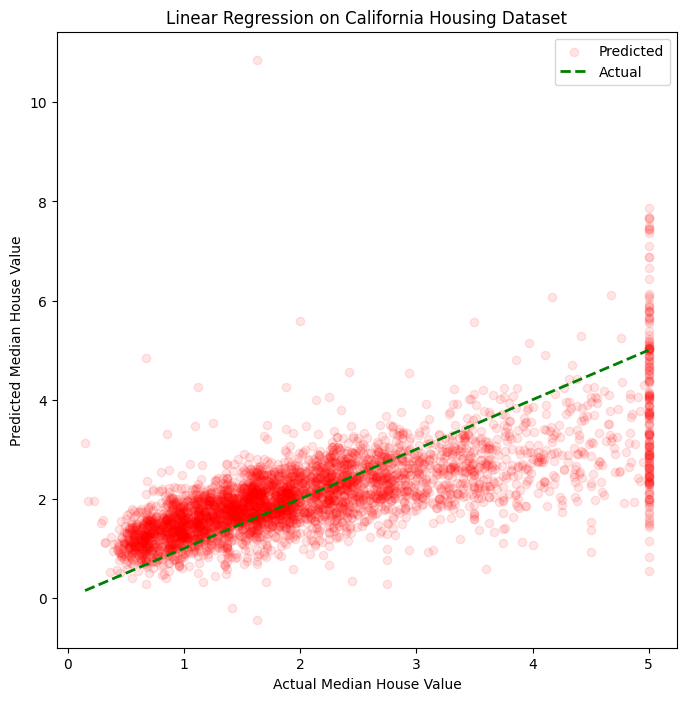

In [53]:
#| label: fig-linReg
#| fig-cap: "Linear Regression on the California Housing dataset"
plt.figure(figsize=(8, 8))  # Set a square figure size
# Plot y_pred in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.1)

# Plot y_test as a line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='green', linewidth=2, label='Actual')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression on California Housing Dataset')
plt.legend()  # Show legend to distinguish between actual and predicted
plt.show()

## Nonlinear Regression

###  Support Vector Regressor (SVR) with a radial basis function (RBF) kernel

In [54]:
#| label: svr_scale
#| code-fold: false

from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
# Reshape the target variable to a 1D array
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [55]:
#| label: svr_model
#| code-fold: false

# Create an SVR model on RBF kernel
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [56]:
#| label: svr_performance
#| code-fold: false
performance_stat(y_test, y_pred)

Mean Absolute Error (MAE): 0.46
Mean Squared Error (MSE): 0.45
Root Mean Squared Error (RMSE): 0.67
R-squared (R²): 0.66


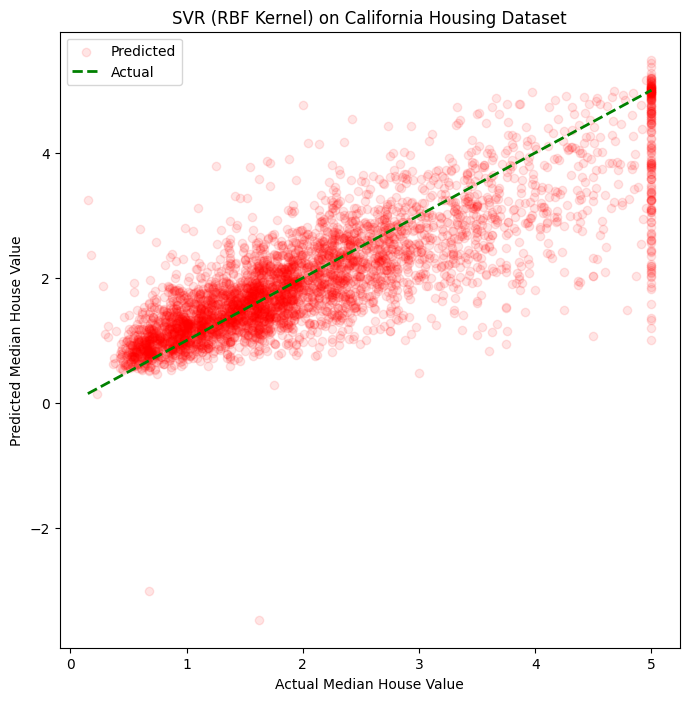

In [57]:
#| label: fig-svr
#| fig-cap: "Noninear Regression (SVR with RBF Kernel) on the California Housing dataset"
plt.figure(figsize=(8, 8))  # Set a square figure size
# Plot y_pred in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.1)

# Plot y_test as a line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='green', linewidth=2, label='Actual')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('SVR (RBF Kernel) on California Housing Dataset')

plt.legend()
plt.show()

### Random Forest Regressor


In [58]:
#| label: rfr_model
#| code-fold: false

# Create a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [59]:
#| label: rfr_performance
#| code-fold: false
performance_stat(y_test, y_pred)

Mean Absolute Error (MAE): 0.46
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.65
R-squared (R²): 0.68


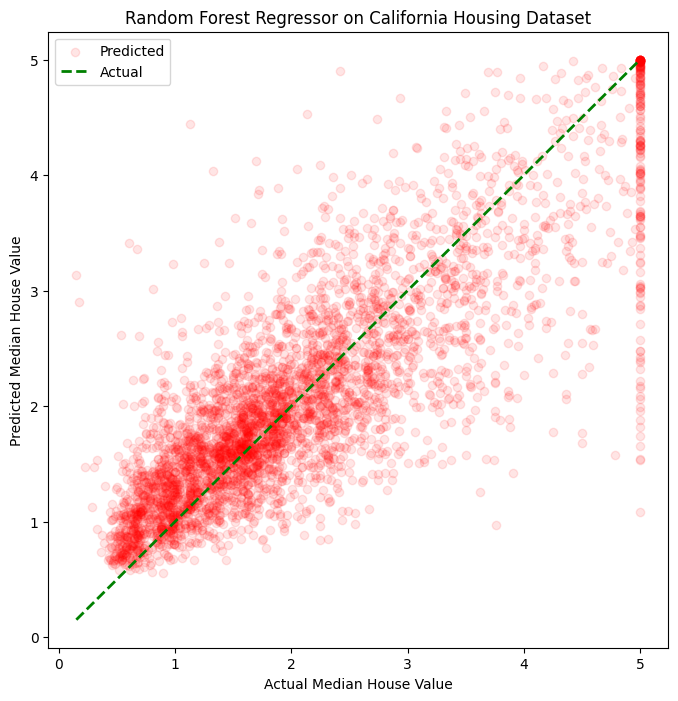

In [60]:
#| label: fig-rfr
#| fig-cap: "Noninear Regression (Random Forest Regressor) on the California Housing dataset"
plt.figure(figsize=(8, 8))  # Set a square figure size
# Plot y_pred in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.1)

# Plot y_test as a line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='green', linewidth=2, label='Actual')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest Regressor on California Housing Dataset')

plt.legend()
plt.show()